In [1]:
## Regression is used to fit the daily increase in confirmed cases.
## We observed an excellent match to a quadratic curve for the time frame 1/22 - 2/08
## Note: that this notebook uses the whole data set from CryptoKass/ncov-data which 
##       at the time of running this notebook might have more recent data available 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimization
from scipy.optimize import fsolve

url = 'https://raw.githubusercontent.com/CryptoKass/ncov-data/master/world.daily-confirmed.jhu.csv'
corona_n = pd.read_csv(url,error_bad_lines = False)

In [2]:
corona_n=corona_n.rename(columns={'Unnamed: 0':'Date'})

In [3]:
c_china = corona_n['Mainland China']
print(c_china)

0     37198
1     31215
2     30612
3     24405
4     24290
5     20400
6     17114
7     14375
8      9783
9      9658
10     7678
11     5970
12     4409
13     2737
14     1979
15      916
16      639
17        0
Name: Mainland China, dtype: int64


In [4]:
c_china_ordered = np.array(list(reversed(c_china)));
cdif = c_china_ordered

In [5]:
xdata = np.arange(0,len(cdif));
ydata = cdif;
x0=np.array([0,0,0]);

def func(x, a, b, c):
    return a + b*x + c*x*x


In [6]:
c_result = optimization.curve_fit(func, xdata, ydata, x0)

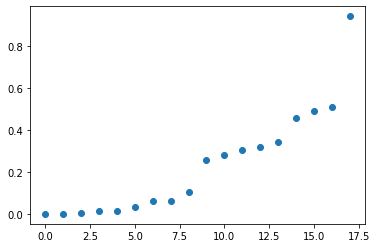

In [7]:
# The errors are projected back on the domain of the function that is matched to the data
# (which is possible due to monotonicity of the function)

x_errs = np.abs(xdata-(-c_result[0][1] + np.sqrt(c_result[0][1]**2- 4*(c_result[0][0]-ydata*c_result[0][2])))/(2*c_result[0][2]))
errs=np.sort(x_errs)
plt.plot(errs,'o')
plt.show()

In [8]:
error_av=np.sum(errs)/len(errs)
print(error_av)

0.2341362715491145


In [9]:
corona_n

,Date,Mainland China,Others,Singapore,Thailand,Hong Kong,Japan,South Korea,Taiwan,Malaysia,...,Nepal,Spain,Sri Lanka,Sweden,Ivory Coast,Mexico,Brazil,Colombia,China,United States
0,02/08,37198,61,40,32,26,25,25,17,16,...,1,1,1,1,0,0,0,0,0,0
1,02/07,31215,61,30,25,25,25,24,16,12,...,1,1,1,1,0,0,0,0,0,0
2,02/06,30612,0,28,25,24,45,23,16,12,...,1,1,1,1,0,0,0,0,0,0
3,02/05,24405,0,28,25,21,22,19,11,12,...,1,1,1,1,0,0,0,0,0,0
4,02/04,24290,0,24,25,18,22,16,11,10,...,1,1,1,1,0,0,0,0,0,0
5,02/03,20400,0,18,19,15,20,15,10,8,...,1,1,1,1,0,0,0,0,0,0
6,02/02,17114,0,18,19,15,20,15,10,8,...,1,1,1,1,0,0,0,0,0,0
7,02/01,14375,0,18,19,14,20,15,10,8,...,1,1,1,1,0,0,0,0,0,0
8,01/31,9783,0,13,19,12,15,11,10,8,...,1,0,1,1,0,0,0,0,0,0
9,01/30,9658,0,10,14,12,11,6,9,8,...,1,0,1,0,0,0,0,0,0,0


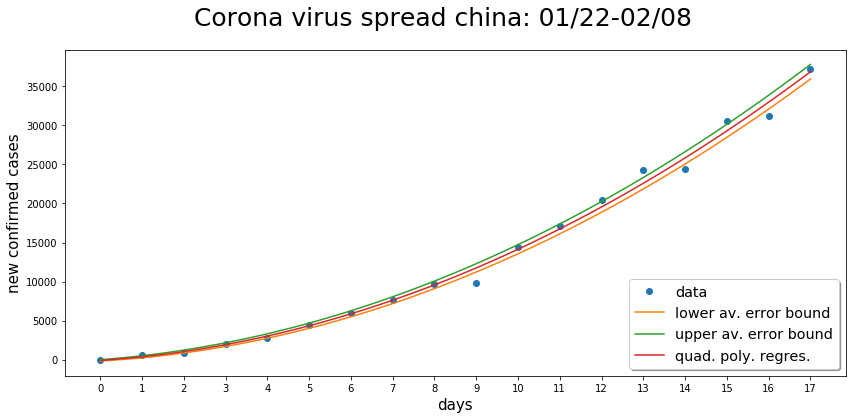

In [10]:

xmax = len(c_china)-1
X0=np.linspace(0,xmax,xmax*5)
Y0=func(X0,c_result[0][0],c_result[0][1],c_result[0][2])

Y1=func(X0-error_av,c_result[0][0],c_result[0][1],c_result[0][2])
Y2=func(X0+error_av,c_result[0][0],c_result[0][1],c_result[0][2]) 


fig, ax = plt.subplots(figsize=(14, 6))
fig.suptitle('Corona virus spread china: '  + corona_n['Date'][len(corona_n.index)-1] + '-' + corona_n['Date'][0],fontsize=25)
ax.plot(cdif,'o',label='data')
ax.plot(X0,Y1, label='lower av. error bound')
ax.plot(X0,Y2, label='upper av. error bound')
ax.plot(X0,Y0, label='quad. poly. regres.')
legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large')
plt.ylabel('new confirmed cases',fontsize=15)
plt.xlabel('days',fontsize=15)
plt.xticks(np.arange(0, xmax+1, step=1))

#plt.savefig('corona_spread.jpg')
plt.show()

In [11]:
## Extrapolation on long time frames is of course totally unreliable but still fun to do
f = lambda x : func(x,c_result[0][0],c_result[0][1],c_result[0][2]) - 8*10**9
x=np.array([10**4,10**5])
fsint= fsolve(f,x)
days_to_complete_virus_infection = round((max(fsint)+min(fsint))/2)
print(days_to_complete_virus_infection)